# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [2]:
# Import required Libraries
import pathlib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import PIL
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Importing Skin Cancer Data Set
- Defining the Path

In [3]:
# Load the dataset from Google Drive
data_dir_train = pathlib.Path("/content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
# Check the directory
os.listdir(data_dir_train)

['actinic keratosis',
 'basal cell carcinoma',
 'nevus',
 'melanoma',
 'dermatofibroma',
 'seborrheic keratosis',
 'pigmented benign keratosis',
 'vascular lesion',
 'squamous cell carcinoma']

In [5]:
img_count_train = len(list(data_dir_train.glob("*/*.jpg")))
img_count_test = len(list(data_dir_test.glob("*/*.jpg")))

In [6]:
# Check the count of the images -
print(img_count_train, img_count_test)

2239 118


- Load the data using keras.preprocessing

In [7]:
# Define paramters for loaders -
batch_size = 32
img_height = 180
img_widht = 180

- Use 80% of the images for training, and 20% for validation

In [8]:
# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = data_dir_train,
                                                               # labels=None,
                                                               batch_size = batch_size,
                                                               image_size=(img_height,img_widht),
                                                               seed = 123,
                                                               validation_split=0.2,
                                                               subset = "training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = data_dir_train,
                                                               # labels=None,
                                                               batch_size = batch_size,
                                                               image_size=(img_height,img_widht),
                                                               seed = 123,
                                                               validation_split=0.2,
                                                               subset = "validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# Get the Class names -
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

# Data Visualization

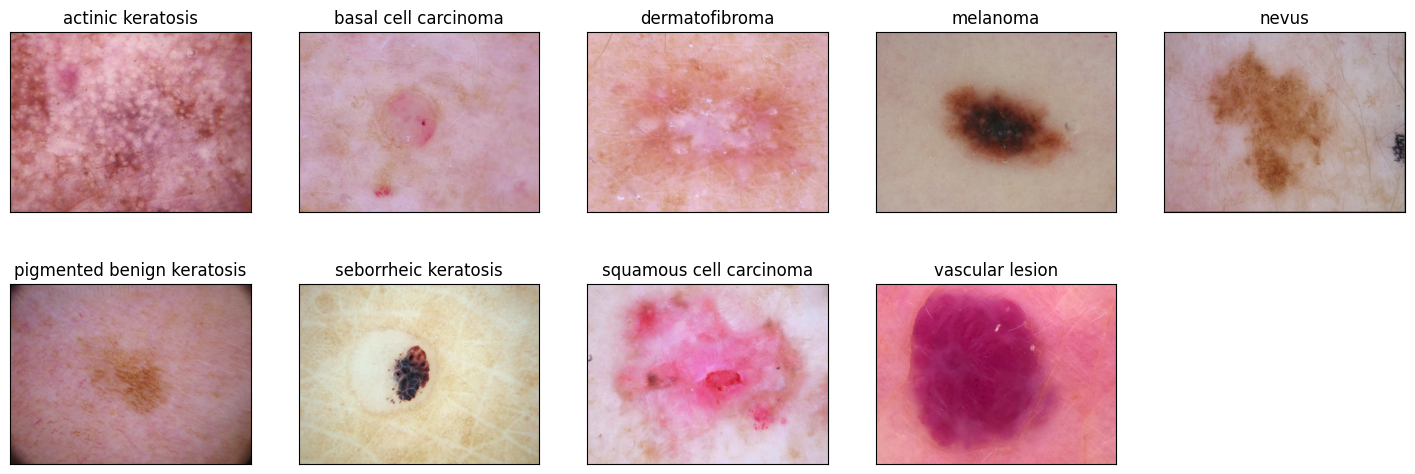

In [14]:
# Visualize the data 
fig = plt.figure(figsize=(18,6))
for i in range(len(class_names)):
  ax = fig.add_subplot(2,5,i+1, xticks=[], yticks=[])
  img = plt.imread(str(list(data_dir_train.glob(class_names[i]+"/*.jpg"))[1]))
  plt.imshow(img)
  ax.set_title(class_names[i])
plt.show()

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the Model

In [16]:
# Model Architecture
Model = Sequential()
Model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
Model.add(Conv2D(32,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(32,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(64,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(64,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Flatten())
Model.add(Dense(512, kernel_regularizer=l2(0.01)))
Model.add(Activation("relu"))
Model.add(Dropout(0.5))
Model.add(Dense(9))
Model.add(Activation("softmax"))

In [19]:
# Compile the data 
Model.compile(optimizer ='sgd',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [20]:
# Model Summary
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                        

In [21]:
# Train the model 
epochs = 20
history = Model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs) 

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 633s 2s/step - loss: 12.1350 - accuracy: 0.1847 - val_loss: 11.9938 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 4s 79ms/step - loss: 11.8840 - accuracy: 0.2188 - val_loss: 11.7540 - val_accuracy: 0.2237
Epoch 3/20
56/56 [==============================] - 5s 81ms/step - loss: 11.6368 - accuracy: 0.2522 - val_loss: 11.5436 - val_accuracy: 0.1946
Epoch 4/20
56/56 [==============================] - 4s 80ms/step - loss: 11.4011 - accuracy: 0.2667 - val_loss: 11.2305 - val_accuracy: 0.3266
Epoch 5/20
56/56 [==============================] - 4s 80ms/step - loss: 11.1658 - accuracy: 0.2974 - val_loss: 10.9604 - val_accuracy: 0.3445
Epoch 6/20
56/56 [==============================] - 5s 82ms/step - loss: 10.9342 - accuracy: 0.2840 - val_loss: 10.7081 - val_accuracy: 0.3758
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 10.7223 - accuracy: 0.3119 - val_loss: 10.5158 - val_accuracy: 0.3714
Epoch 8/20

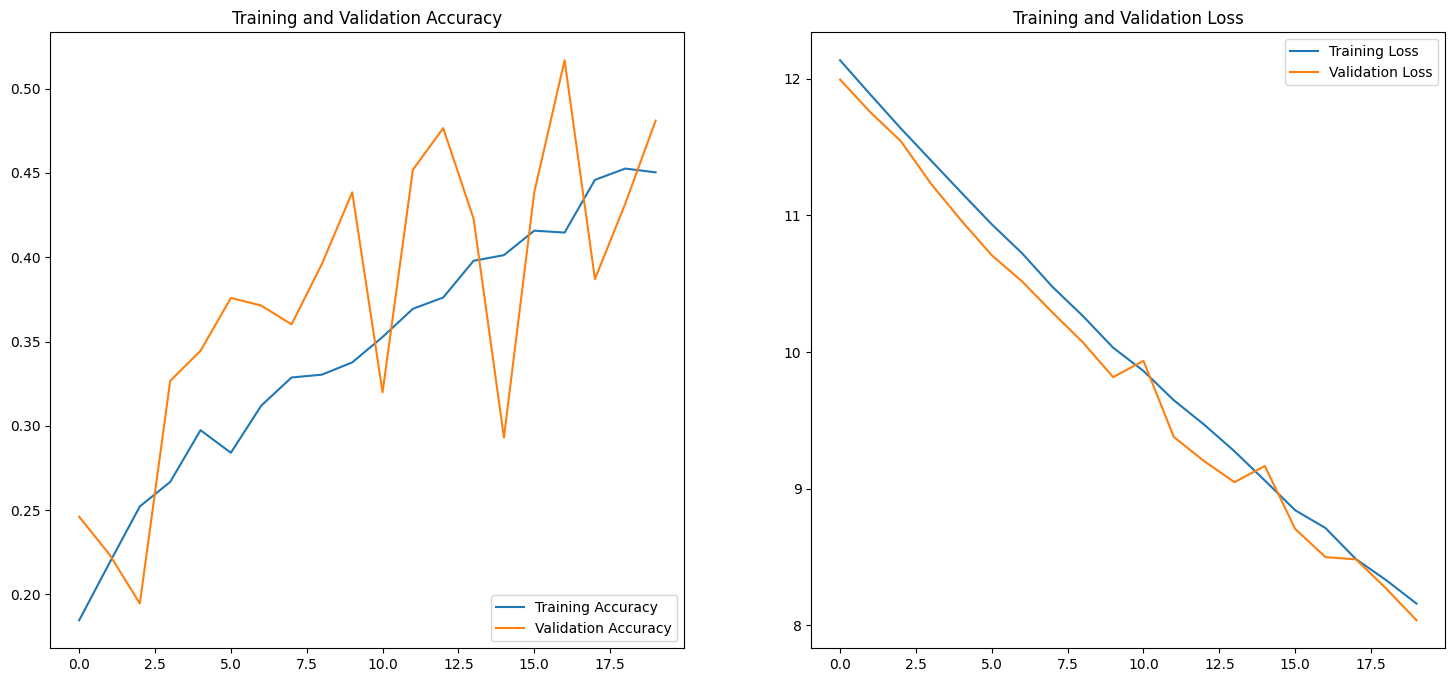

In [22]:
# Visualize the training results -

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Findings for the Model fit -
1. The accuracy for test data and validation data is very low.
2. This indicated that the model is underfitting and we need to apply corrective measures.

# Model With Dropout

In [23]:
# Model Architecture
Model = Sequential()
Model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
Model.add(Conv2D(32,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(32,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(64,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(64,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Flatten())
Model.add(Dense(512, kernel_regularizer=l2(0.01)))
Model.add(Activation("relu"))
Model.add(Dropout(0.5))
Model.add(Dense(9))
Model.add(Activation("softmax"))

In [24]:
# Compile the data 
Model.compile(optimizer ='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [25]:
# Train the model 
epochs = 20
history = Model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
56/56 [==============================] - 9s 110ms/step - loss: 5.9740 - accuracy: 0.2294 - val_loss: 2.7089 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 6s 107ms/step - loss: 2.2396 - accuracy: 0.3343 - val_loss: 2.0154 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 6s 106ms/step - loss: 2.0057 - accuracy: 0.3471 - val_loss: 1.8627 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 6s 108ms/step - loss: 1.8944 - accuracy: 0.3811 - val_loss: 1.7828 - val_accuracy: 0.4072
Epoch 5/20
56/56 [==============================] - 6s 107ms/step - loss: 1.8381 - accuracy: 0.3884 - val_loss: 1.8844 - val_accuracy: 0.3803
Epoch 6/20
56/56 [==============================] - 6s 109ms/step - loss: 1.8266 - accuracy: 0.3867 - val_loss: 1.7731 - val_accuracy: 0.3937
Epoch 7/20
56/56 [==============================] - 6s 108ms/step - loss: 1.7875 - accuracy: 0.4035 - val_loss: 1.7074 - val_accuracy: 0.4586
Epoch 

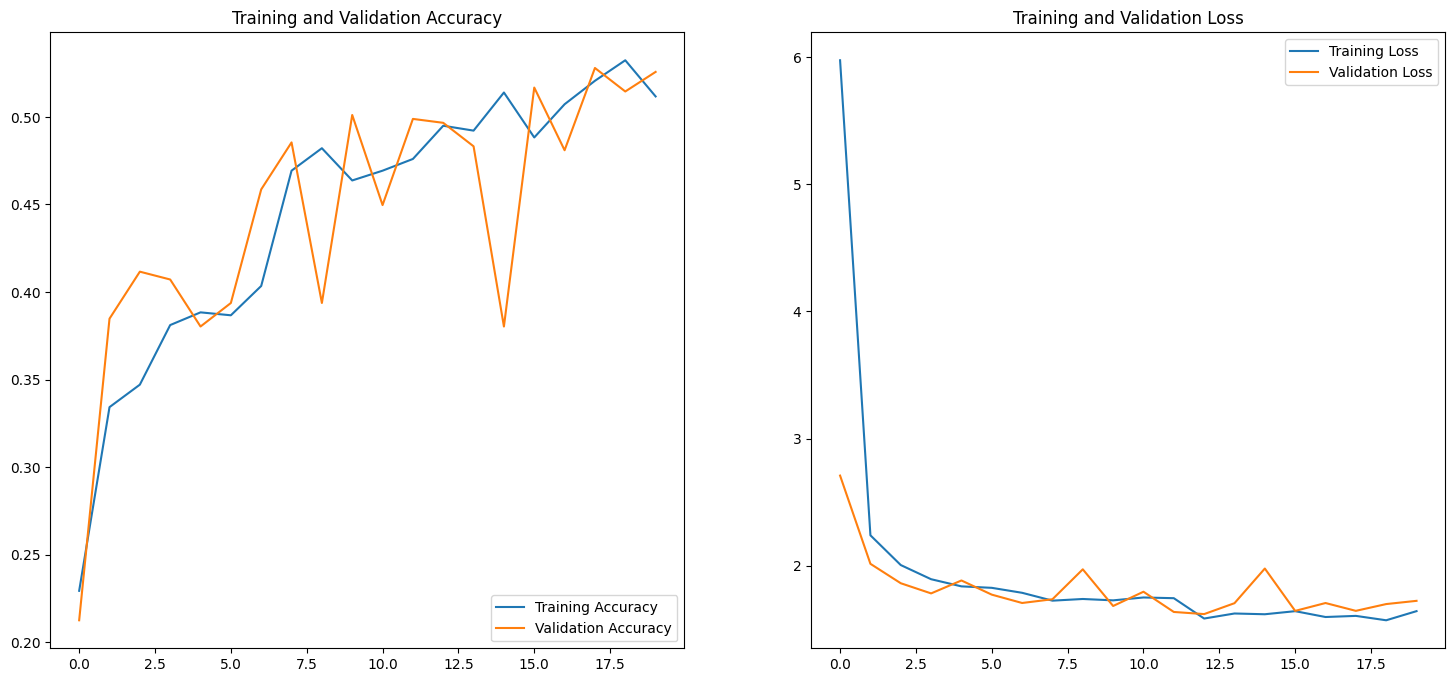

In [34]:
# Visualize the training results -

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Findings 
1. Even after applying the dropout layer, we don't see significant increase in the accuracy.
2. We need to check for class distribution.

# Finding the Class Imbalance

In [27]:
# Get the dataframe -
path_list  = []
label_list = []
for i in class_names:
  for j in data_dir_train.glob(i+"/*.jpg"):
    path_list.append(str(j))
    label_list.append(i)
data_frame = pd.DataFrame({"Path": path_list, "Labels": label_list})
data_frame.head()

,Path,Labels
0,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
1,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
2,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
3,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
4,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis


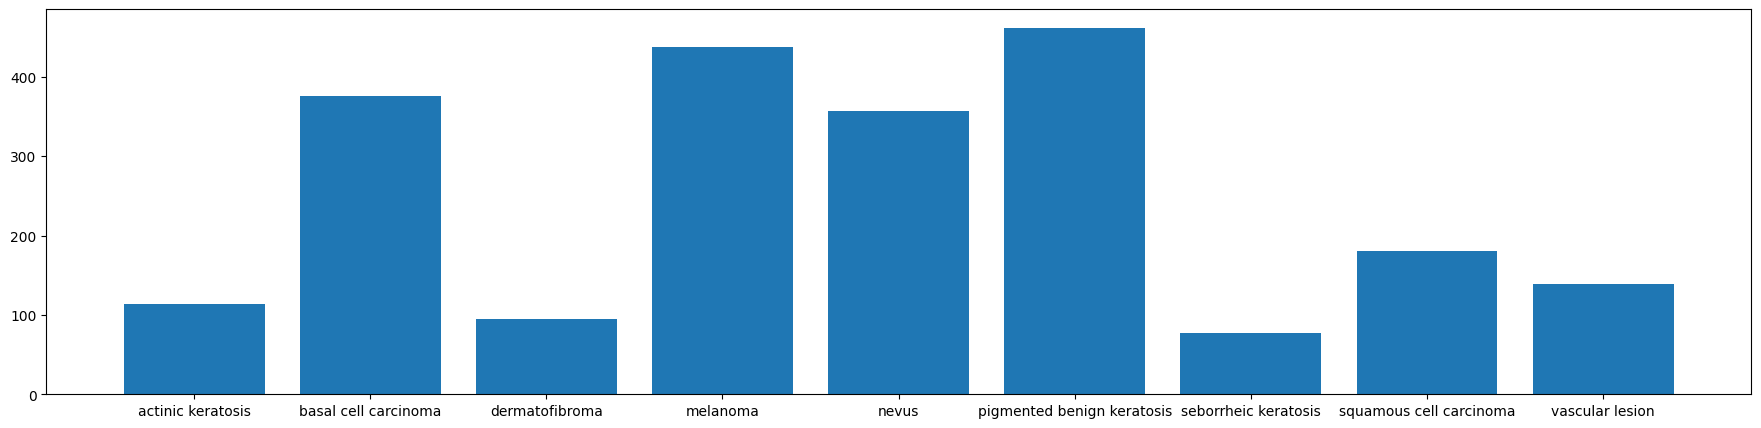

In [29]:
# Get the graph
count = []
for i in class_names:
  count.append(len(list(data_dir_train.glob(i+"/*.jpg"))))
plt.figure(figsize=(22,5))
plt.bar(class_names, count)
plt.show()

- Findings 
1. The Class "antinic Keratosis", "dermatofibroma", and "seborrheic keratosis" has less than 100 images for training the neural network
2. Apart from this, classes such as "basal cell carcinoma", "melanoma", "nevus", and "pigmented benign keratosis" have close to 400 images.
3. This shows that there is a huge class imbalance within the data set.
4. We can rectify the same using Augmentor library.

# Rectify the Imbalance

In [30]:
! pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Excute augmentor
import Augmentor
path_to_training_dataset = "/content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset+i)
  p.rotate(probability =0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7EE32DABB0>: 100%|██████████| 500/500 [00:21<00:00, 23.08 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7EE3797D30>: 100%|██████████| 500/500 [00:21<00:00, 22.95 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7EE337CEB0>: 100%|██████████| 500/500 [00:22<00:00, 22.34 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7EE3346250>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F7EE31E4940>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7EF0271040>: 100%|██████████| 500/500 [00:21<00:00, 23.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7EE32FA370>: 100%|██████████| 500/500 [00:47<00:00, 10.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7EE31C83D0>: 100%|██████████| 500/500 [00:21<00:00, 23.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7F848F84C0>: 100%|██████████| 500/500 [00:20<00:00, 24.55 Samples/s]


In [33]:
# Verify the count of the images -
count_of_train_images = len(list(data_dir_train.glob("*/output/*.jpg")))
count_of_train_images

4500

In [35]:
# See the distribution post Augmentation
for i in class_names:
  for j in data_dir_train.glob(i+"*/output/*.jpg"):
    path_list.append(str(j))
    label_list.append(i)
data_frame = pd.DataFrame({"Path": path_list, "Labels": label_list})
data_frame.head()

,Path,Labels
0,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
1,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
2,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
3,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis
4,/content/drive/MyDrive/Code practise/CNN_assig...,actinic keratosis


In [36]:
# Check the distribution -
data_frame["Labels"].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Labels, dtype: int64

# Model After Augmentation

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [38]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Code practise/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed =123,
                                                               validation_split=0.2,
                                                               subset = "training",
                                                               image_size = (img_height, img_width),
                                                               batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed =123,
                                                               validation_split=0.2,
                                                               subset = "validation",
                                                               image_size = (img_height, img_width),
                                                               batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [40]:
# Model Architecture
Model = Sequential()
Model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
Model.add(Conv2D(32,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(32,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(64,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(Conv2D(64,(3,3)))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Flatten())
Model.add(Dense(512, kernel_regularizer=l2(0.01)))
Model.add(Activation("relu"))
Model.add(Dropout(0.5))
Model.add(Dense(9))
Model.add(Activation("softmax"))

In [41]:
# Compile the model -
Model.compile(optimizer ='sgd',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [42]:
# Model Summary -
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_13 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                      

In [43]:
# Train the model
epochs = 30
history_1 = Model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)
 

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 41s 221ms/step - loss: 12.0522 - accuracy: 0.1476 - val_loss: 11.7173 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 40s 232ms/step - loss: 11.3413 - accuracy: 0.1957 - val_loss: 11.0206 - val_accuracy: 0.1604
Epoch 3/30
169/169 [==============================] - 38s 220ms/step - loss: 10.6549 - accuracy: 0.2264 - val_loss: 10.3561 - val_accuracy: 0.2524
Epoch 4/30
169/169 [==============================] - 42s 243ms/step - loss: 10.0077 - accuracy: 0.2611 - val_loss: 9.6100 - val_accuracy: 0.2888
Epoch 5/30
169/169 [==============================] - 43s 247ms/step - loss: 9.3749 - accuracy: 0.3151 - val_loss: 9.0717 - val_accuracy: 0.3452
Epoch 6/30
169/169 [==============================] - 37s 213ms/step - loss: 8.7922 - accuracy: 0.3494 - val_loss: 8.4409 - val_accuracy: 0.4113
Epoch 7/30
169/169 [==============================] - 38s 219ms/step - loss: 8.2562 - accuracy: 0.3898 - val_loss: 7.9279 - val_accura

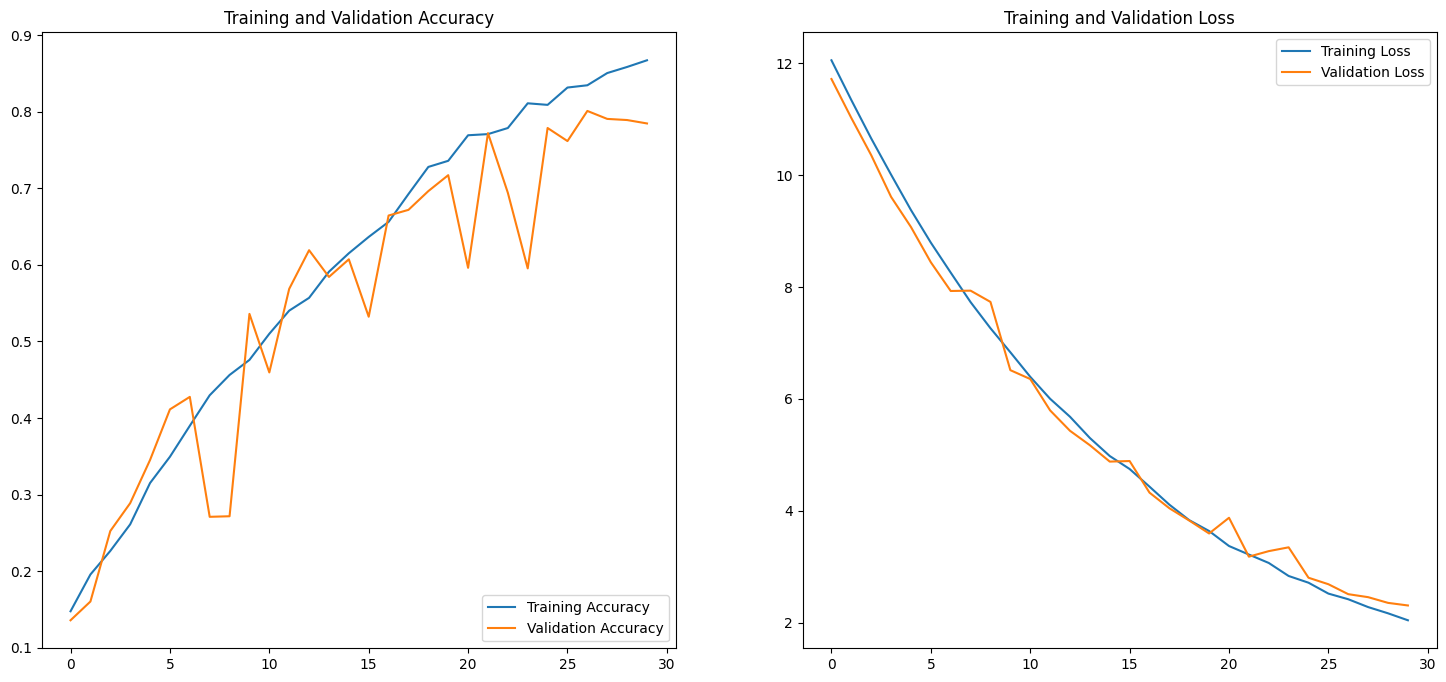

In [45]:
# Visualize the training results -

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Analysis 
1. We are now able to get rid of underfitting issue.
2. Also the train dataset accuracy and validation data set accuracy are close to each other indicating the model has also not overfitted.
3. So the corrective measure of balancing the class has worked.